In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# Load cleaned datasets (if running separately)
crop_data = pd.read_csv('Crop Data.csv')
rainfall_data = pd.read_csv('Rainfall.csv')
nutrient_data = pd.read_csv('Crop Nutrient.csv')
price_data = pd.read_csv('Crop Price.csv')

In [3]:
# Set style
sns.set_style('whitegrid')

##### EDA on Crop Data

In [4]:
print("Crop Data Columns:", crop_data.columns)
print("\nTop Crops by Count:\n", crop_data['Crop'].value_counts().head())

Crop Data Columns: Index(['State', 'District', 'Crop', 'Year', 'Season', 'Area', 'Production',
       'Yield', 'Crop_encoded'],
      dtype='object')

Top Crops by Count:
 Rice         18949
Maize        18214
Groundnut    11714
Sesamum      11651
Wheat        10077
Name: Crop, dtype: int64


#### Plot 1: Top 10 most grown crops 

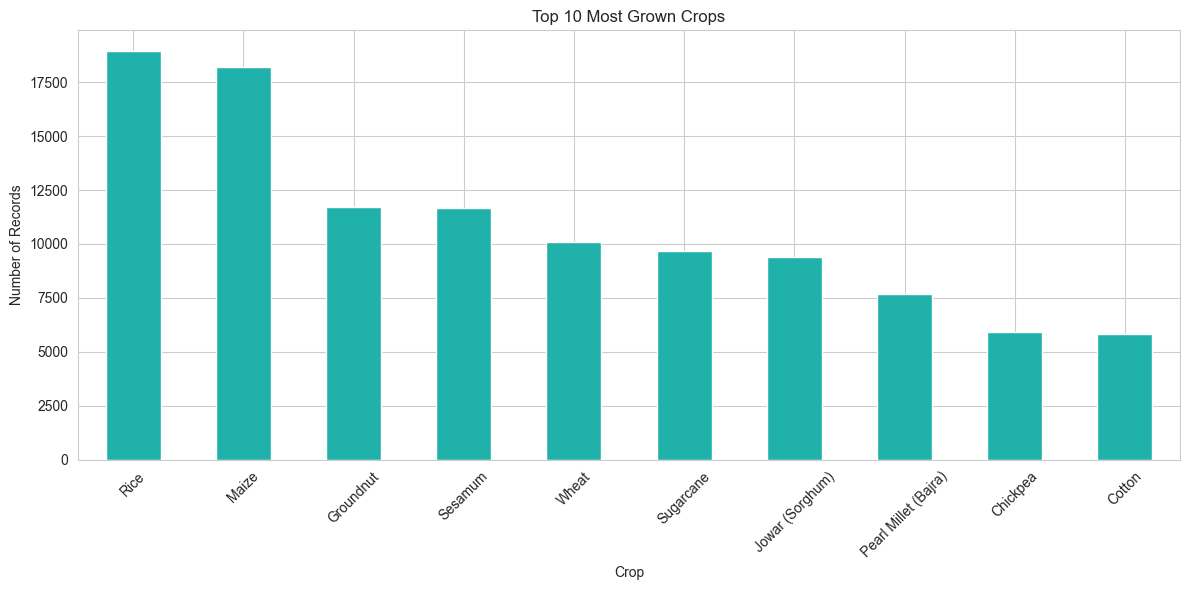

In [5]:
plt.figure(figsize=(12, 6))
crop_data['Crop'].value_counts().head(10).plot(kind='bar', color='LightSeaGreen')
plt.title('Top 10 Most Grown Crops')
plt.ylabel('Number of Records')
plt.xlabel('Crop')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


#### Plot 2: Yield Distribution

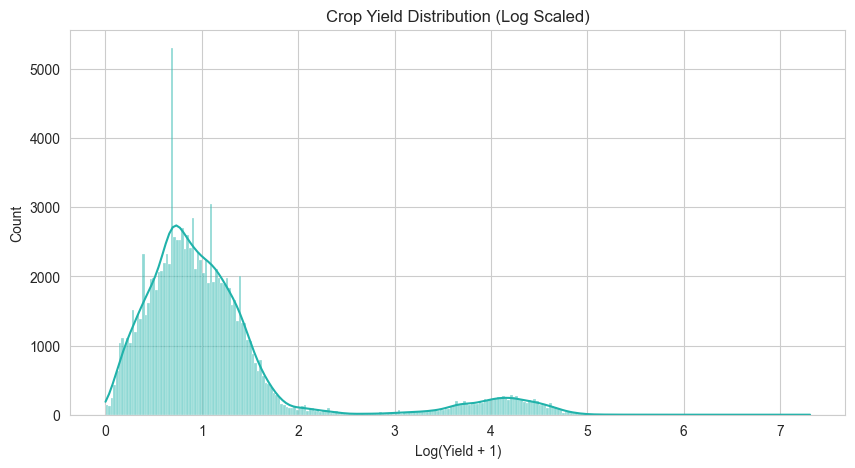

In [6]:
plt.figure(figsize=(10, 5))
sns.histplot(np.log1p(crop_data['Yield']), kde=True, color='LightSeaGreen')
plt.title('Crop Yield Distribution (Log Scaled)')
plt.xlabel('Log(Yield + 1)')
plt.show()

##### EDA on Rainfall Data

In [7]:
print("\nRainfall Data Columns:", rainfall_data.columns)



Rainfall Data Columns: Index(['Year', 'State', 'District', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
       'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec', 'Annual'],
      dtype='object')


#### Plot 3: Annual Rainfall Trend

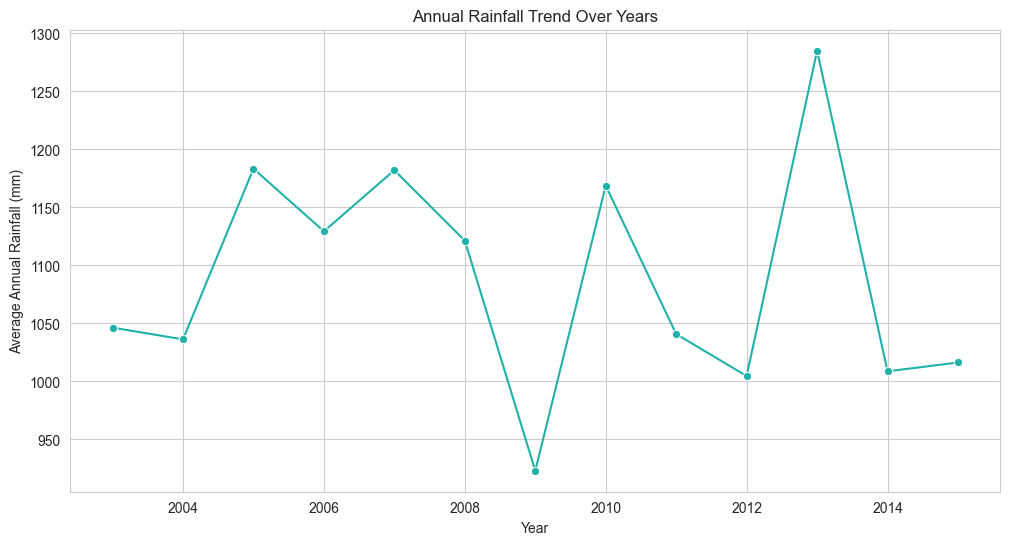

In [8]:
plt.figure(figsize=(12, 6))
rainfall_yearly = rainfall_data.groupby('Year')['Annual'].mean().reset_index()
sns.lineplot(data=rainfall_yearly, x='Year', y='Annual', marker='o', color ='LightSeaGreen')
plt.title('Annual Rainfall Trend Over Years')
plt.ylabel('Average Annual Rainfall (mm)')
plt.xlabel('Year')
plt.show()

##### EDA on Rainfall Data

In [9]:
print("\nNutrient Data Columns:", nutrient_data.columns)



Nutrient Data Columns: Index(['N', 'P', 'K', 'Temperature', 'Humidity', 'pH', 'Rainfall', 'Crop'], dtype='object')


#### Plot 4: NPK Distribution


<Figure size 1200x600 with 0 Axes>

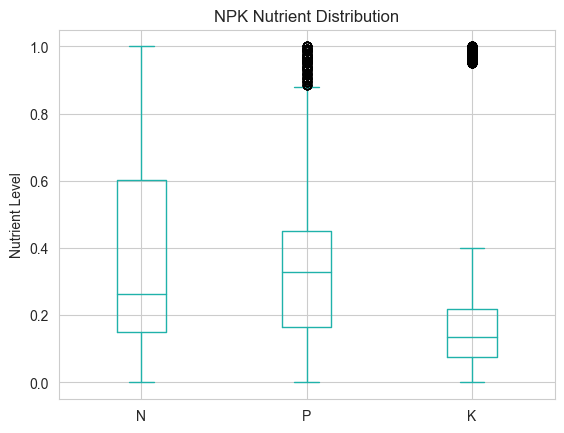

In [10]:
plt.figure(figsize=(12, 6))
nutrient_data[['N', 'P', 'K']].plot(kind='box' , color ='LightSeaGreen')
plt.title('NPK Nutrient Distribution')
plt.ylabel('Nutrient Level')
plt.show()

##### Correlation Heatmap - Crop Data

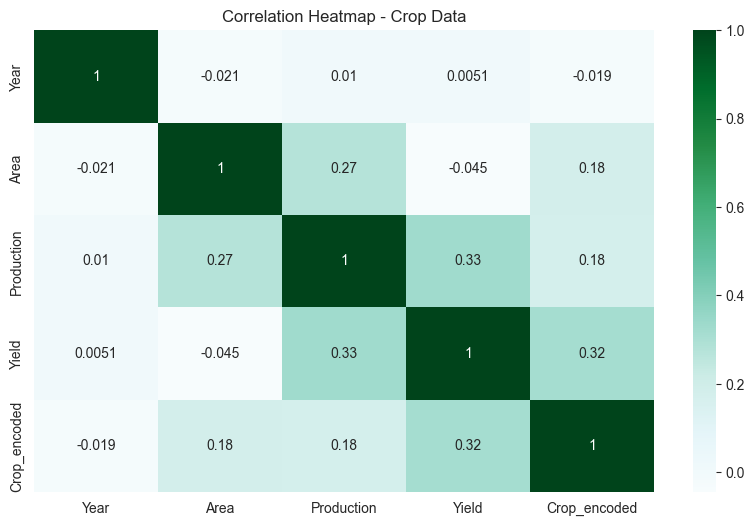

In [11]:
plt.figure(figsize=(10, 6))

# Select only numeric columns for correlation
numeric_cols = crop_data.select_dtypes(include='number')

# Calculate correlation
correlation = numeric_cols.corr()

# Plot heatmap
sns.heatmap(correlation, annot=True, cmap='BuGn')
plt.title('Correlation Heatmap - Crop Data')
plt.show()


##### EDA on Price Data

##### Plot 5: Average Market Price per Crop

In [12]:
print("\nPrice Data Columns:", price_data.columns)



Price Data Columns: Index(['Year', 'State', 'District', 'Rice', 'Wheat', 'Jowar', 'Pearl Millet',
       'Maize', 'Barley', 'Chickpea', 'Groundnut', 'Sesamum', 'Sugarcane',
       'Cotton'],
      dtype='object')


In [13]:
# Melt the dataset
price_melted = price_data.melt(id_vars=['Year', 'State', 'District'], 
                               var_name='Crop', 
                               value_name='Price')

In [14]:
# Now you can group by 'Crop'
avg_price = price_melted.groupby('Crop')['Price'].mean().sort_values(ascending=False).head(10)


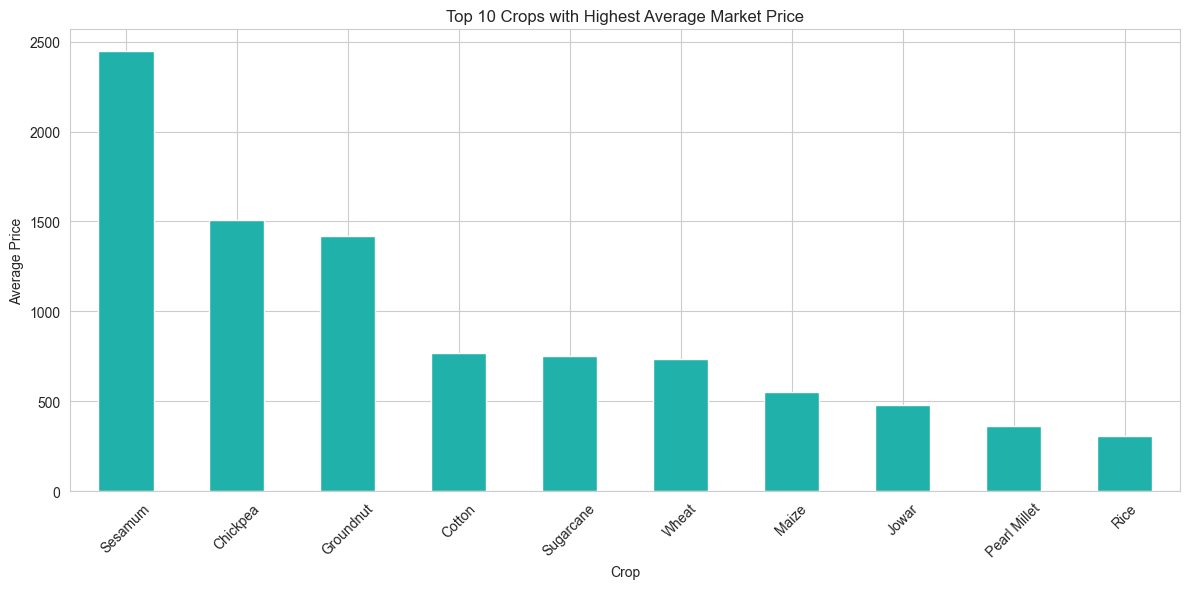

In [15]:
# Plotting
plt.figure(figsize=(12, 6))
avg_price.plot(kind='bar', color='LightSeaGreen')
plt.title('Top 10 Crops with Highest Average Market Price')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()